<a href="https://colab.research.google.com/github/lafunes/Machine_Learning/blob/main/Hw2_ML_FunesVelasquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/ML/Assignment 2')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
Housing = pd.read_csv('Housing.csv')

In [26]:
file_path = '/content/gdrive/My Drive/ML/Assignment 2/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [27]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def data_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 0.5, 'furnished': 1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(data_map)
print('All housing data with binary inputs replaced with ones and zeros: \n')
housing.head()

All housing data with binary inputs replaced with ones and zeros: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,1.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,1.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,0.5
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,1.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,1.0


In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
print('Training set after data split : \n')
train.head()

Training set after data split : 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1.0,1.0,1.0,0.0,1.0,1,0.0,1.0
41,7840000,6360,3,2,4,1.0,0.0,0.0,0.0,1.0,0,1.0,1.0
91,6419000,6750,2,1,1,1.0,1.0,1.0,0.0,0.0,2,1.0,1.0
118,5950000,6420,3,1,1,1.0,0.0,1.0,0.0,1.0,0,1.0,1.0
472,3010000,3630,4,1,2,1.0,0.0,0.0,0.0,0.0,3,0.0,0.5


In [29]:
def gradient_descent(train, test, price_train, price_test, alpha, theta, iterations):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta -= alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

<ipython-input-29-9ed5b2e43f58>:9: RuntimeWarning: overflow encountered in square
  train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
<ipython-input-29-9ed5b2e43f58>:10: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))
<ipython-input-29-9ed5b2e43f58>:7: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


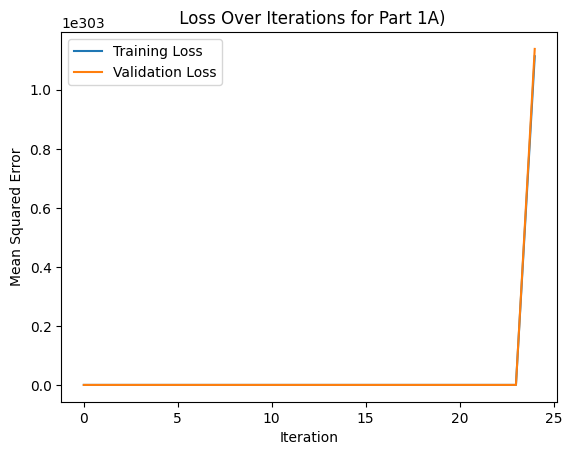

In [30]:
# Problem 1A : 1B)

# initial values
price_train = train.values[:, 0] # Output price
price_test = test.values[:, 0] # Output test price


train_len = len(price_train)  # Number of training examples for training set
test_len = len(price_test)  # Number of training examples for test set


vars_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
vars_1a_train = np.c_[np.ones((train_len, 1)), train[vars_1a]]
vars_1a_test = np.c_[np.ones((test_len, 1)), test[vars_1a]]

vars_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vars_1b_train = np.c_[np.ones((train_len, 1)), train[vars_1b]]
vars_1b_test = np.c_[np.ones((test_len, 1)), test[vars_1b]]

# Train a simple linear regression model using gradient descent
alpha = 0.01
iterations = 100

theta_1a = np.zeros(6)
theta_1b = np.zeros(12)

# Gradient descent for part 1.a
train_losses, val_losses = gradient_descent(vars_1a_train, vars_1a_test, price_train, price_test, alpha, theta_1a, iterations)

# 4. Plot the training and validation loss after each iteration for part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title(" Loss Over Iterations for Part 1A)")
plt.show()

<ipython-input-29-9ed5b2e43f58>:9: RuntimeWarning: overflow encountered in square
  train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
<ipython-input-29-9ed5b2e43f58>:10: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))
<ipython-input-29-9ed5b2e43f58>:7: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


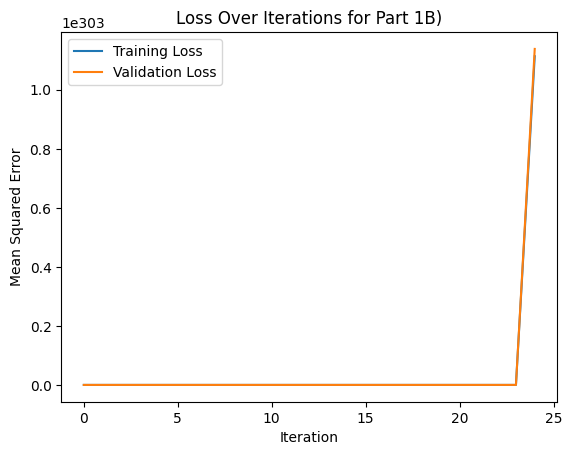

In [31]:

# Gradient descent for part 1B
train_losses, val_losses = gradient_descent(vars_1b_train, vars_1b_test, price_train, price_test, alpha, theta_1b, iterations)



# Plot the training and validation loss after each iteration for part 1B
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Part 1B)")
plt.show()

In [32]:
# Problem 2A) - Normalized Inputs

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_norm = MinMaxScaler()
scaler_stand = StandardScaler()

# Apply MinMax scaler to the training set columns for part 1.a) except the 'yes-no' and 'price' columns
train_norm_a = train
train_norm_a[vars_1a] = scaler_norm.fit_transform(train_norm_a[vars_1a])


In [33]:
# Apply MinMax scaler to the testing set columns for part 1.a) except the 'yes-no' and 'price' columns
test_norm_a = test
test_norm_a[vars_1a] = scaler_norm.fit_transform(test_norm_a[vars_1a])

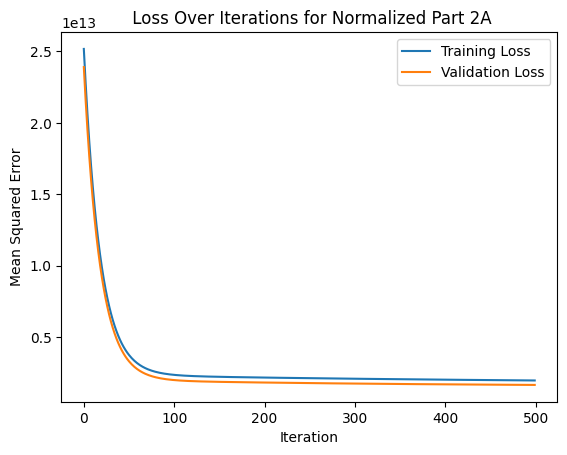

In [34]:
vars_2a_train_norm = np.c_[np.ones((train_len, 1)), train_norm_a[vars_1a]]
vars_2a_test_norm = np.c_[np.ones((test_len, 1)), test_norm_a[vars_1a]]

theta_2a_n = np.zeros(6)

iterations_2a_n = 500
alpha_2a_n = 0.01

# Doing the gradient descent for normalized inputs from part 1.a
train_losses, val_losses = gradient_descent(vars_2a_train_norm, vars_2a_test_norm, price_train, price_test, alpha_2a_n, theta_2a_n, iterations_2a_n)


# Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title(" Loss Over Iterations for Normalized Part 2A")
plt.show()

In [35]:
# Problem 2A) - Standardized Inputs

# Apply StandarScaler scaler to the training set columns for part 1.a) except the 'yes-no' and 'price' columns
train_stand_a = train
train_stand_a[vars_1a] = scaler_stand.fit_transform(train_stand_a[vars_1a])
print('Training set with only 5 inputs being standardized: \n')
train_stand_a.head()

Training set with only 5 inputs being standardized: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1.0,1.0,1.0,0.0,1.0,0.311484,0.0,1.0
41,7840000,0.565326,0.078679,1.410929,2.474792,1.0,0.0,0.0,0.0,1.0,-0.849261,1.0,1.0
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1.0,1.0,1.0,0.0,0.0,1.472229,1.0,1.0
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1.0,0.0,1.0,0.0,1.0,-0.849261,1.0,1.0
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1.0,0.0,0.0,0.0,0.0,2.632974,0.0,0.5


In [36]:
# Apply StandarScaler scaler to the testing set columns for part 1.a) except the 'yes-no' and 'price' columns
test_stand_a = test
test_stand_a[vars_1a] = scaler_stand.fit_transform(test_stand_a[vars_1a])
print('Test set with only 5 inputs being standardized: \n')
test_stand_a.head()

Test set with only 5 inputs being standardized: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1.0,0.0,0.0,0.0,0.0,-0.643743,1.0,0.5
54,7350000,0.369177,-0.072023,1.466964,0.308415,1.0,1.0,0.0,0.0,1.0,0.545545,0.0,0.5
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1.0,0.0,0.0,0.0,0.0,0.545545,1.0,0.5
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1.0,1.0,1.0,0.0,0.0,-0.643743,1.0,0.5
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1.0,0.0,0.0,0.0,1.0,-0.643743,0.0,0.5


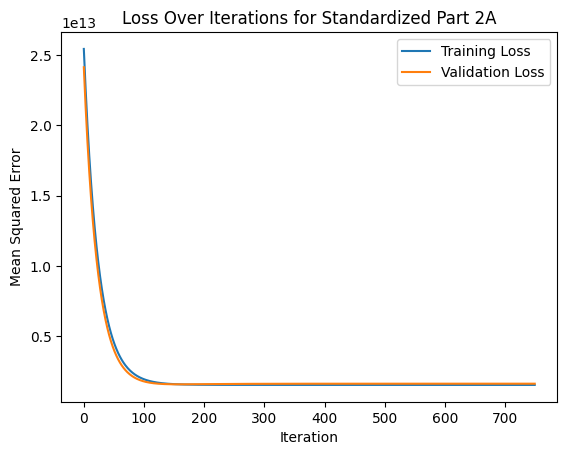

In [37]:
vars_2a_train_stand = np.c_[np.ones((train_len, 1)), train_stand_a[vars_1a]]
vars_2a_test_stand = np.c_[np.ones((test_len, 1)), test_stand_a[vars_1a]]

theta_2a_s = np.zeros(6)

iterations_2a_s = 750
alpha_2a_s = 0.01

# Doing the gradient descent for standardized inputs from part 1.a
train_losses, val_losses = gradient_descent(vars_2a_train_stand, vars_2a_test_stand, price_train, price_test, alpha_2a_s, theta_2a_s, iterations_2a_s)


# Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Standardized Part 2A")
plt.show()

In [38]:
# Problem 2B) - Normalized Inputs

# Apply MinMax scaler to the training set columns for part 1.b) except the 'yes-no' and 'price' columns
train_norm_b = train
train_norm_b[vars_1b] = scaler_norm.fit_transform(train_norm_b[vars_1b])
print('Normalized training set for 2.b): \n')
train_norm_b.head()

Normalized training set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0
41,7840000,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0
91,6419000,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,1.0
118,5950000,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0
472,3010000,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5


In [39]:
# Apply MinMax scaler to the testing set columns for part 1.b) except the 'yes-no' and 'price' columns
test_norm_b = test
test_norm_b[vars_1b] = scaler_norm.fit_transform(test_norm_b[vars_1b])
print('\n Normalized test set for 2.b): \n')
test_norm_b.head()


 Normalized test set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
54,7350000,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.5
171,5250000,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.5
244,4550000,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.5
268,4382000,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.5


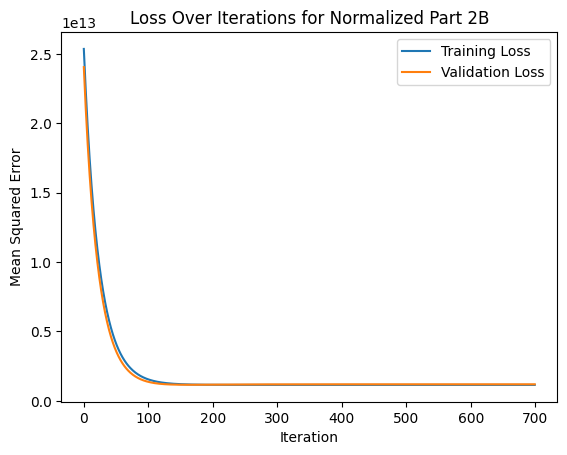

In [59]:
vars_2b_train_norm = np.c_[np.ones((train_len, 1)), train_norm_b[vars_1b]]
vars_2b_test_norm = np.c_[np.ones((test_len, 1)), test_norm_b[vars_1b]]

theta_2b_n = np.zeros(12)

iterations_2b_n = 700
alpha_2b_n = 0.01

# Doing the gradient descent for normalized inputs from part 1.b
train_losses, val_losses = gradient_descent(vars_2b_train_norm, vars_2b_test_norm, price_train, price_test, alpha_2b_n, theta_2b_n, iterations_2b_n)


# Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Normalized Part 2B")
plt.show()

In [41]:
# Problem 2B) - Standardized Inputs

# Apply StandarScaler scaler to the training set columns for part 1.b) except the 'yes-no' and 'price' columns
train_stand_b = train
train_stand_b[vars_1b] = scaler_stand.fit_transform(train_stand_b[vars_1b])
print('Standardized training set for 2.b): \n')
train_stand_b.head()

Standardized training set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083,1.0
41,7840000,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217,1.0
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217,1.0
118,5950000,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217,1.0
472,3010000,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083,0.5


In [42]:
# Apply StandarScaler scaler to the testing set columns for part 1B) except the 'yes-no' and 'price' columns
test_stand_b = test
test_stand_b[vars_1b] = scaler_stand.fit_transform(test_stand_b[vars_1b])
print('Standardized test set for 2.b): \n')
test_stand_b.head()

Standardized test set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710,0.5
54,7350000,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819,0.5
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710,0.5
244,4550000,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710,0.5
268,4382000,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819,0.5


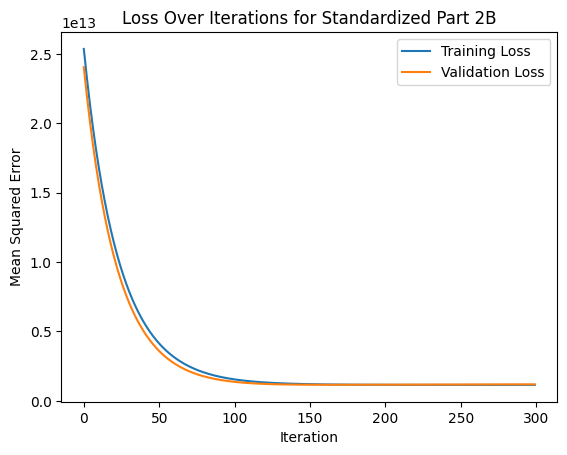

In [60]:

vars_2b_train_stand = np.c_[np.ones((train_len, 1)), train_stand_b[vars_1b]]
vars_2b_test_stand = np.c_[np.ones((test_len, 1)), test_stand_b[vars_1b]]

theta_2b_s = np.zeros(12)

iterations_2b_s = 300
alpha_2b_s = 0.01

# Doing the gradient descent for standardized inputs from part 1.b
train_losses, val_losses = gradient_descent(vars_2b_train_stand, vars_2b_test_stand, price_train, price_test, alpha_2b_s, theta_2b_s, iterations_2b_s)



# Plot the training and validation loss after each iteration for standardized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Standardized Part 2B")
plt.show()

In [44]:
def gradient_descent_penalty(train, test, price_train, price_test, alpha, theta, iterations, pen_par):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta -= alpha * gradients
        train_loss = (1/len(train)) * (np.sum(np.square(train.dot(theta) - price_train)) + pen_par*np.square(np.sum(theta)))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

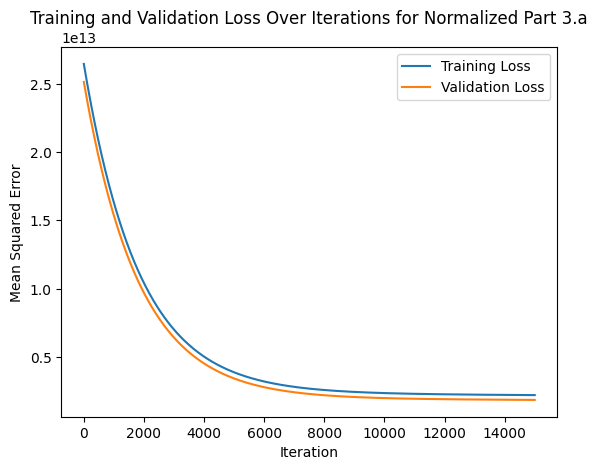

In [63]:
# Problem 3A) - Normalized Inputs

vars_3a_train_norm = vars_2a_train_norm
vars_3a_test_norm = vars_2a_test_norm

theta_3a_n = np.zeros(6)

iterations_3a_n = 15000
alpha_3a_n = 0.0001
pen_par = 0.000000001

# Doing the gradient descent for normalized inputs from part 1.a
train_losses_3an, val_losses_3an = gradient_descent_penalty(vars_3a_train_norm, vars_3a_test_norm, price_train, price_test, alpha_3a_n, theta_3a_n, iterations_3a_n, pen_par)


# Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses_3an, label="Training Loss")
plt.plot(val_losses_3an, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()

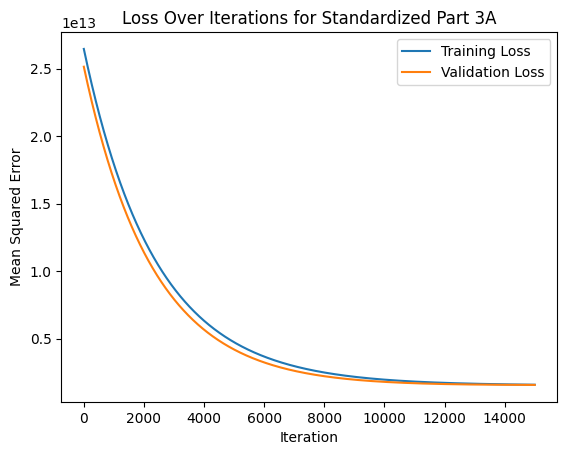

In [68]:

# Problem 3A) - Standardized Inputs

vars_3a_train_stand = vars_2a_train_stand
vars_3a_test_stand = vars_2a_test_stand

theta_3a_s = np.zeros(6)

iterations_3a_s = 15000
alpha_3a_s = 0.0001
pen_par = 0.00000001

# Doing the gradient descent for standardized inputs from part 1.a
train_losses_3as, val_losses_3as = gradient_descent_penalty(vars_3a_train_stand, vars_3a_test_stand, price_train, price_test, alpha_3a_s, theta_3a_s, iterations_3a_s, pen_par)



# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses_3as, label="Training Loss")
plt.plot(val_losses_3as, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Standardized Part 3A")
plt.show()

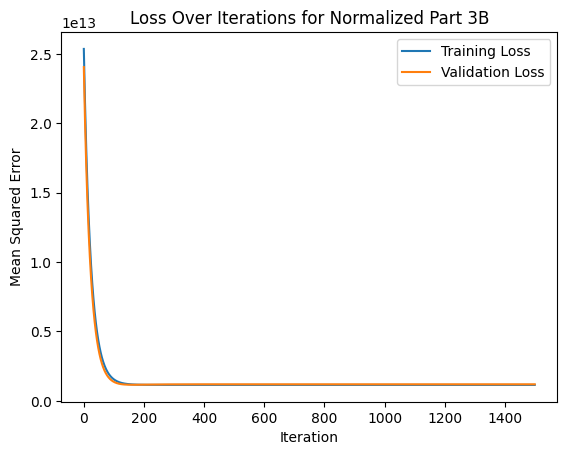

In [64]:
# Problem 3B) Normalized Inputs

vars_3b_train_norm = vars_2b_train_norm
vars_3b_test_norm = vars_2b_test_norm


theta_3b_n = np.zeros(12)

iterations_3b_n = 1500
alpha_3b_n = 0.01
pen_par = 0.00000001

# Doing the gradient descent for normalized inputs from part 1.b
train_losses_3bn, val_losses_3bn = gradient_descent_penalty(vars_3b_train_norm, vars_3b_test_norm, price_train, price_test, alpha_3b_n, theta_3b_n, iterations_3b_n, pen_par)

# Plot the loss after each iteration for normalized part 1B
plt.plot(train_losses_3bn, label="Training Loss")
plt.plot(val_losses_3bn, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Normalized Part 3B")
plt.show()

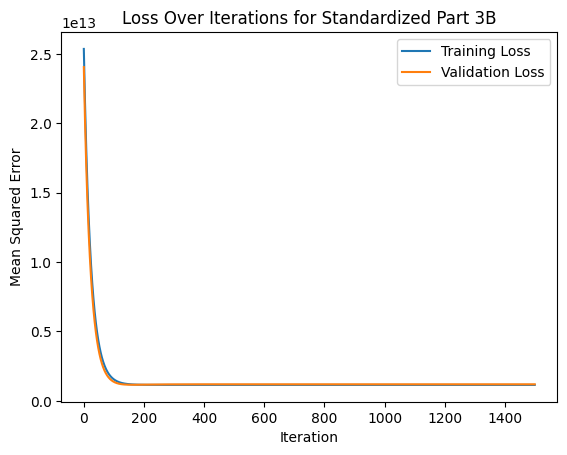

In [65]:
# Problem 3B) Standardized Inputs

vars_3b_train_stand = vars_2b_train_stand
vars_3b_test_stand = vars_2b_test_stand

theta_3b_s = np.zeros(12)

iterations_3b_s = 1500
alpha_3b_s = 0.01
pen_par = 0.00000001

# Doing the gradient descent for normalized inputs from part 1.b
train_losses_3bs, val_losses_3bs = gradient_descent_penalty(vars_3b_train_stand, vars_3b_test_stand, price_train, price_test, alpha_3b_s, theta_3b_s, iterations_3b_s, pen_par)



#Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses_3bs, label="Training Loss")
plt.plot(val_losses_3bs, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Loss Over Iterations for Standardized Part 3B")
plt.show()